# Phase 3
Youssef Nakhla 900201430
Karim AbouDaoud 900212779

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix

In [51]:
import pandas as pd
df=pd.read_csv("Post-cleaning Data.csv")

In [52]:
df.head()

,hotel,is_canceled,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,...,Dist TA/TO,GDS,No Deposit,Refundable,Non Refund,Transient,Contract,Transient-Party,Group,total_guests
0,0,0,2,0,0,0,0,0,3,0,...,0,0,1,0,0,1,0,0,0,2
1,0,0,2,0,0,0,0,0,4,0,...,0,0,1,0,0,1,0,0,0,2
2,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,2,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,2


# Testing and Training Datasets

In [55]:
columns_to_drop = ['reservation_status_date', 'arrival_date']
df.drop(columns=columns_to_drop, inplace=True)
train = df.drop(['is_canceled'], axis=1)
test = df['is_canceled']
train = train.iloc[:,1:]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95186, 39), (95186,), (23797, 39), (23797,))

# Standardizing the Data

In [57]:
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Scaling the numeric features
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train[numeric_cols])
X_test_std = scaler.transform(X_test[numeric_cols])



# 1. Logistic Regression

Average cross validation score: 0.799
Test accuracy: 0.799
F1 score: 0.737
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     15018
           1       0.71      0.76      0.74      8779

    accuracy                           0.80     23797
   macro avg       0.78      0.79      0.79     23797
weighted avg       0.80      0.80      0.80     23797



Text(0.5, 23.52222222222222, 'Predicted label')

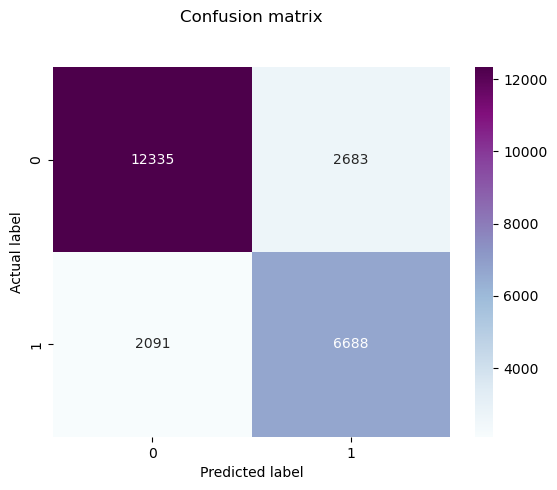

In [58]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train_std, y_train)
scores = cross_val_score(logreg, X_train_std, y_train, cv=5)
logreg_pred = logreg.predict(X_test_std)
clf_report = classification_report(y_test, logreg_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, logreg_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="BuPu")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
print ('intercept W_0 :', logreg.intercept_)
print ('coefficients W_i:', logreg.coef_)

intercept W_0 : [-0.14878918]
coefficients W_i: [[ 3.31582418e+00 -8.00648030e-01  1.77634148e+01 -5.64075287e+00
   2.24063190e+00 -3.31531795e+00 -5.38738543e+00 -1.08125086e+00
   3.10527132e+00 -2.41282883e+01 -3.68310225e+00  3.78888653e+00
   4.29142319e+00  2.49215306e-01 -2.39807254e-01 -2.52581307e-02
  -4.77986903e-01 -2.16683289e-02  8.62268090e-01 -9.20517702e-01
   3.27717507e-02 -6.66988656e-01  1.14932334e+00 -6.12696963e-01
   1.71960779e-01 -6.78631148e-02 -6.47567472e-02 -2.78968091e-01
   3.79396807e-01  2.56532093e-01 -3.93542092e-01 -1.67501834e+00
  -1.38534364e+00  3.00211237e+00  5.84850057e-01 -2.01202464e-01
   3.60965214e-02 -4.77993726e-01  3.36197517e+00]]


In [60]:
TP = confusion[0][0]
FP = confusion[1][0]
TN = confusion[1][1]
FN = confusion[0][1]
TNR = TN/(TN+FP)
TNR

0.7618179747123818

# Naive Bayes Classifier

Average cross validation score: 0.587
Test accuracy: 0.584
F1 score: 0.613
Recall score: 0.892
Precision score: 0.466
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.40      0.55     15018
           1       0.47      0.89      0.61      8779

    accuracy                           0.58     23797
   macro avg       0.67      0.65      0.58     23797
weighted avg       0.72      0.58      0.57     23797



<AxesSubplot:>

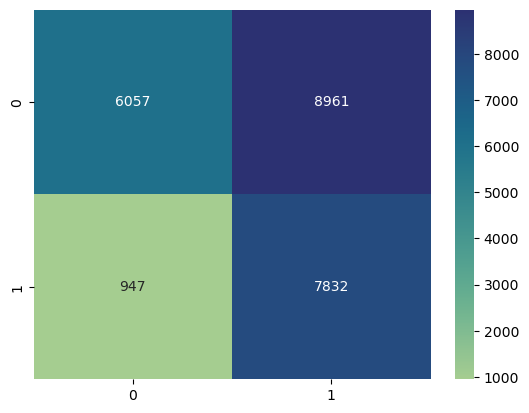

In [61]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=5)
gnb_pred = gnb.predict(X_test)
clf_report = classification_report(y_test, gnb_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(gnb.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, gnb_pred)))
print("Recall score: {:.3f}".format(recall_score(y_test, gnb_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, gnb_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, gnb_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="crest")

# Multiple Layer Perception

# Identity Function Activation

Train score: 0.803
Test accuracy: 0.799
F1 score: 0.694
[[13586  1432]
 [ 3351  5428]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     15018
           1       0.79      0.62      0.69      8779

    accuracy                           0.80     23797
   macro avg       0.80      0.76      0.77     23797
weighted avg       0.80      0.80      0.79     23797



<AxesSubplot:>

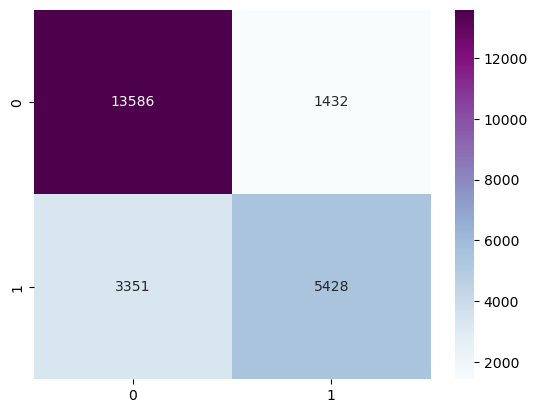

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(20,),alpha=0.001, solver='sgd', activation='identity')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
clf_report = classification_report(y_test, mlp_pred)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="BuPu")

In [63]:
TP = confusion[0][0]
FP = confusion[1][0]
TN = confusion[1][1]
FN = confusion[0][1]
specifity = TN/(FP+TN)
specifity

0.6182936553138171

# Sigmoid Function Activation

Train score: 0.805
Test accuracy: 0.805
F1 score: 0.705
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.85     15018
           1       0.80      0.63      0.71      8779

    accuracy                           0.80     23797
   macro avg       0.80      0.77      0.78     23797
weighted avg       0.80      0.80      0.80     23797



<AxesSubplot:>

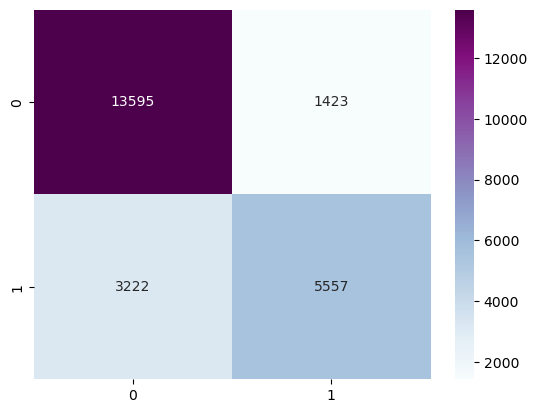

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(47, 20), solver='sgd', activation='logistic')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
clf_report = classification_report(y_test, mlp_pred)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="BuPu")

In [65]:
TP = confusion[0][0]
FP = confusion[1][0]
TN = confusion[1][1]
FN = confusion[0][1]
specifity = TN/(FP+TN)
specifity

0.6329878118236701

# Hyperbolic Tangent Activation

Train score: 0.830
Test accuracy: 0.831
F1 score: 0.761
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     15018
           1       0.79      0.73      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.82      0.81      0.81     23797
weighted avg       0.83      0.83      0.83     23797



<AxesSubplot:>

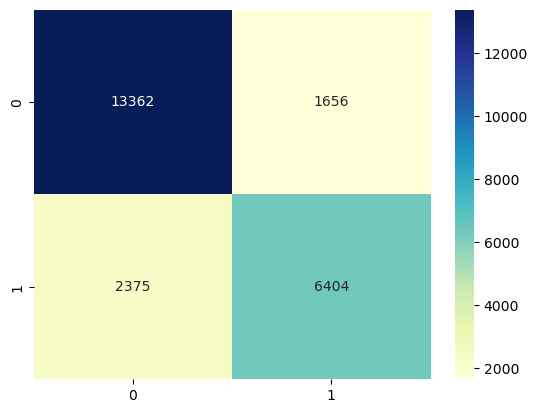

In [66]:
mlp = MLPClassifier(hidden_layer_sizes=[47, 20], alpha=0.001, solver='sgd', activation='tanh')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="YlGnBu")

In [67]:
TP = confusion[0][0]
FP = confusion[1][0]
TN = confusion[1][1]
FN = confusion[0][1]
specifity = TN/(FP+TN)
specifity

0.7294680487527053

# Rectified Linear Unit Function Activation

Train score: 0.881
Test accuracy: 0.857
F1 score: 0.797
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15018
           1       0.84      0.76      0.80      8779

    accuracy                           0.86     23797
   macro avg       0.85      0.84      0.84     23797
weighted avg       0.86      0.86      0.86     23797



<AxesSubplot:>

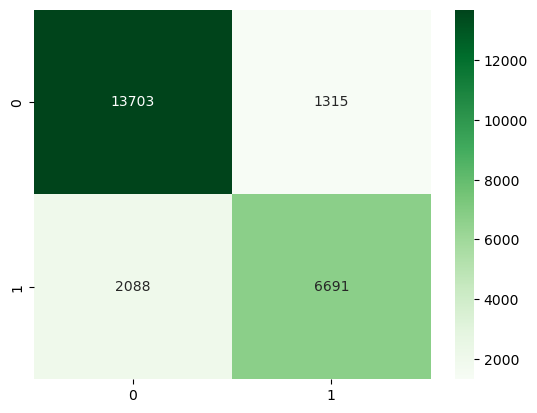

In [68]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=500, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="Greens")

In [69]:
TP = confusion[0][0]
FP = confusion[1][0]
TN = confusion[1][1]
FN = confusion[0][1]
specifity = TN/(FP+TN)
specifity

0.7621596992823784

# Decision Trees: ID3

Average cross validation score: 0.751
Test accuracy: 0.749
F1 score: 0.486
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15018
           1       0.84      0.76      0.80      8779

    accuracy                           0.86     23797
   macro avg       0.85      0.84      0.84     23797
weighted avg       0.86      0.86      0.86     23797



<AxesSubplot:>

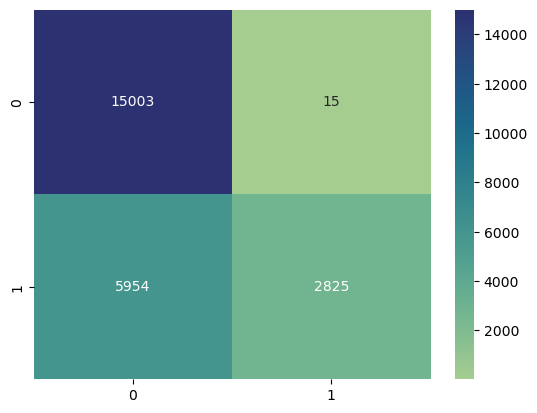

In [70]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, tree_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="crest")

# CART

Average cross validation score: 0.751
Test accuracy: 0.749
F1 score: 0.486
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15018
           1       0.84      0.76      0.80      8779

    accuracy                           0.86     23797
   macro avg       0.85      0.84      0.84     23797
weighted avg       0.86      0.86      0.86     23797



<AxesSubplot:>

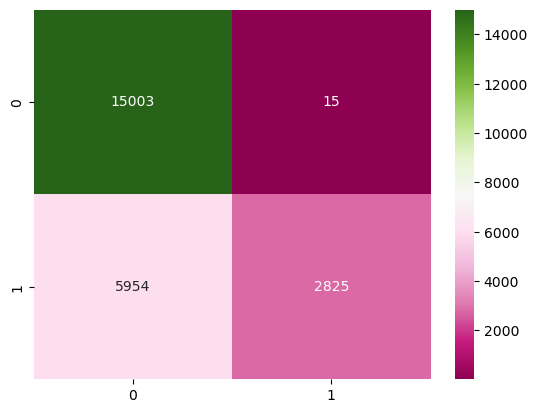

In [71]:
tree = DecisionTreeClassifier(criterion="gini",max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, tree_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="PiYG")

# Random Forest

Accuracy Score of Random Forest is : 0.8743539101567425
F1 score: 0.825
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     15018
           1       0.85      0.80      0.82      8779

    accuracy                           0.87     23797
   macro avg       0.87      0.86      0.86     23797
weighted avg       0.87      0.87      0.87     23797



<AxesSubplot:>

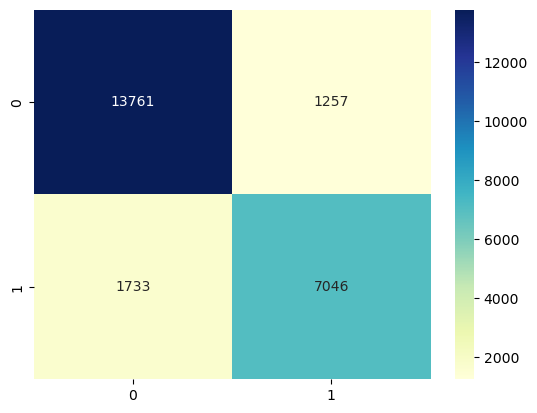

In [72]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred_rd_clf)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, y_pred_rd_clf)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="YlGnBu")

# KNN

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix, auc

For k =  1
accuracy score for training =  0.833715045586386
accuracy score for testing =  0.8377526578980544
error rate in prediction =  0.16224734210194558
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     15018
           1       0.77      0.79      0.78      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



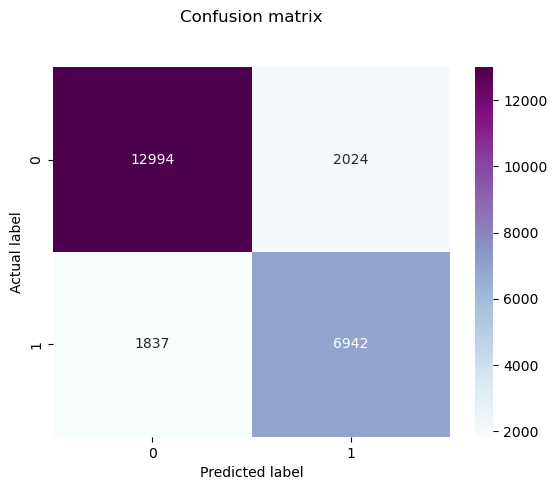

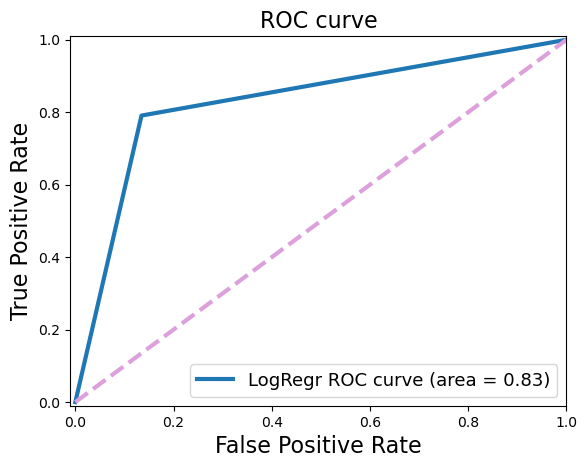

For k =  3
accuracy score for training =  0.8389153956955333
accuracy score for testing =  0.8424591335042232
error rate in prediction =  0.1575408664957768
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     15018
           1       0.79      0.78      0.78      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



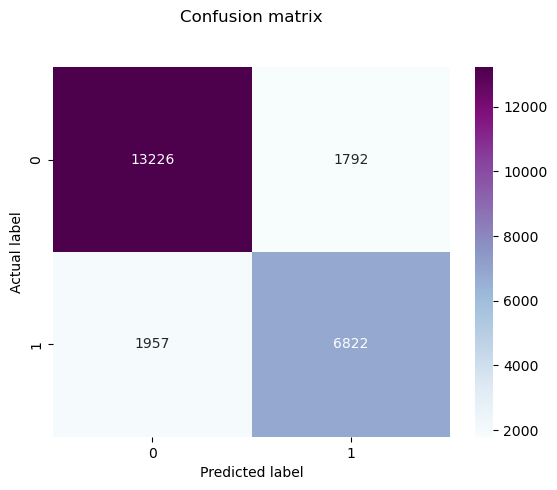

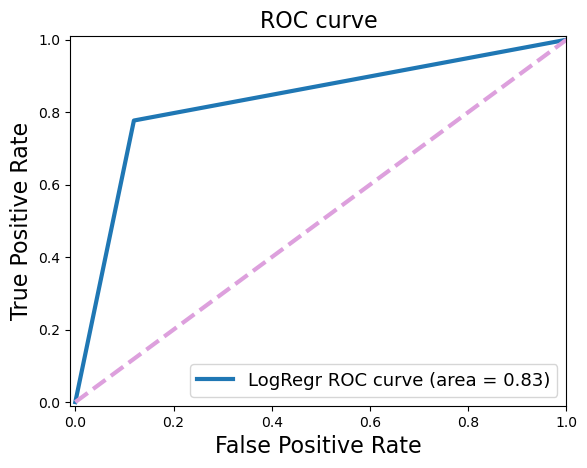

For k =  5
accuracy score for training =  0.8402916331653826
accuracy score for testing =  0.8443501281674161
error rate in prediction =  0.15564987183258394
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     15018
           1       0.80      0.77      0.78      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



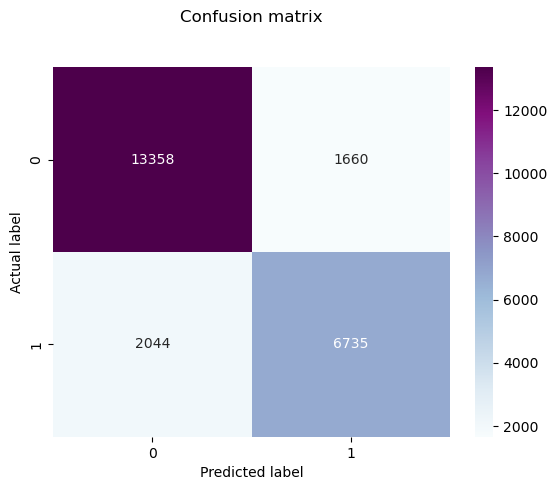

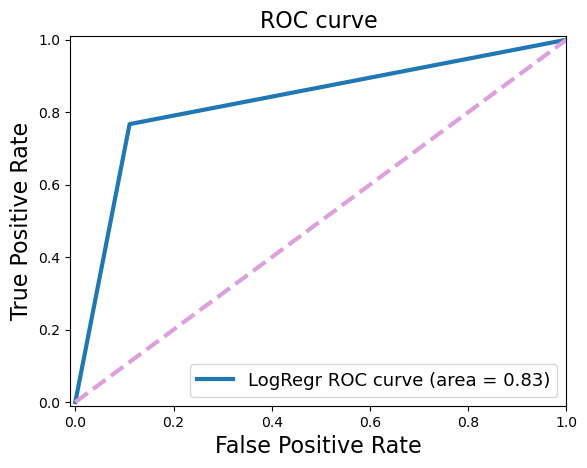

For k =  7
accuracy score for training =  0.8420775880221045
accuracy score for testing =  0.8453586586544523
error rate in prediction =  0.15464134134554774
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.81      0.76      0.78      8779

    accuracy                           0.85     23797
   macro avg       0.84      0.83      0.83     23797
weighted avg       0.84      0.85      0.84     23797



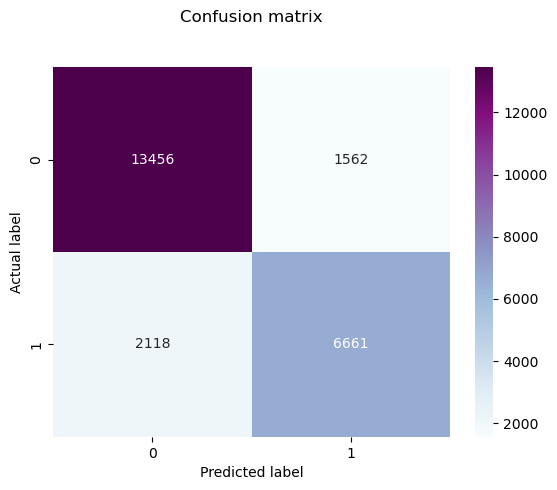

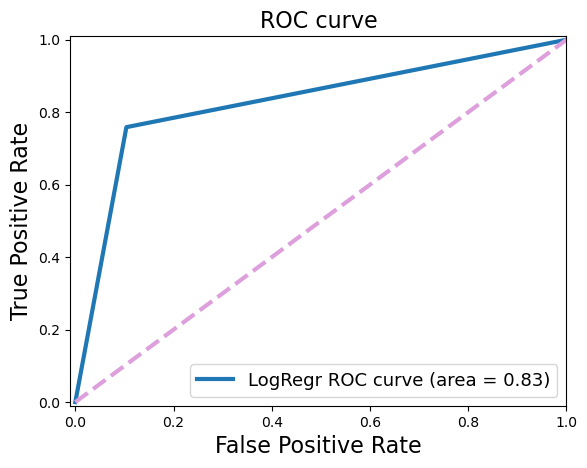

For k =  9
accuracy score for training =  0.84181495925548
accuracy score for testing =  0.8461570786233559
error rate in prediction =  0.15384292137664413
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.81      0.76      0.78      8779

    accuracy                           0.85     23797
   macro avg       0.84      0.83      0.83     23797
weighted avg       0.84      0.85      0.84     23797



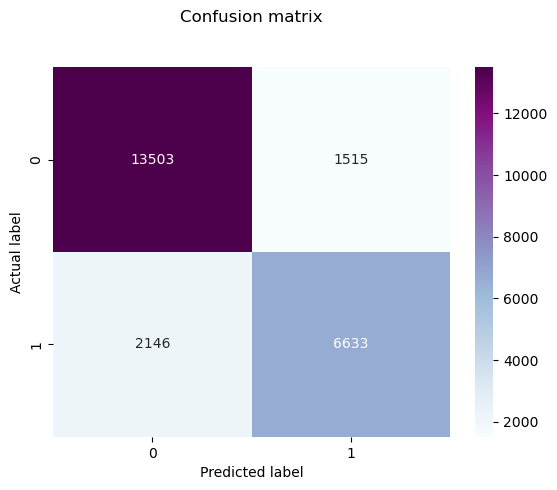

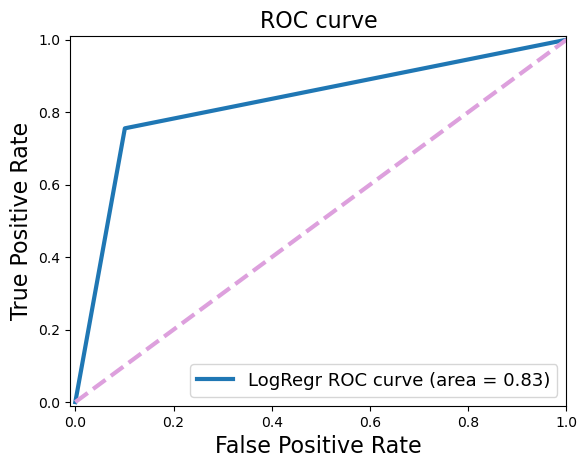

For k =  11
accuracy score for training =  0.8411321011747692
accuracy score for testing =  0.8468714543850066
error rate in prediction =  0.15312854561499345
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.75      0.78      8779

    accuracy                           0.85     23797
   macro avg       0.84      0.83      0.83     23797
weighted avg       0.85      0.85      0.85     23797



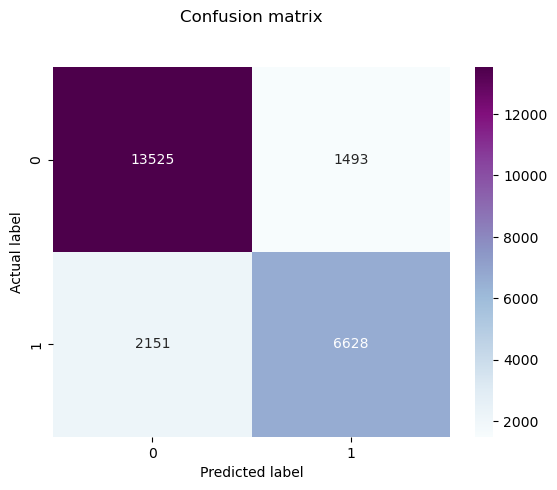

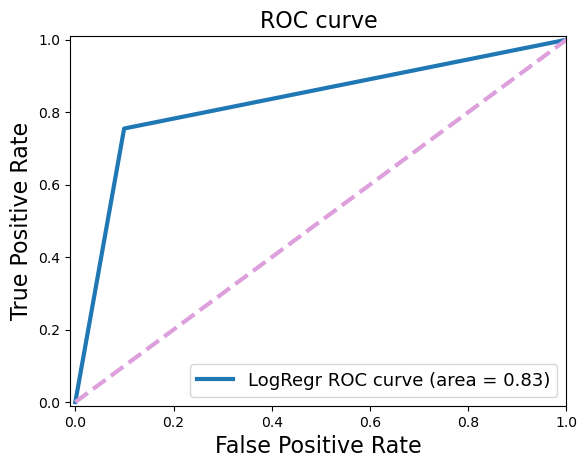

For k =  13
accuracy score for training =  0.8403336621118054
accuracy score for testing =  0.8465772996596209
error rate in prediction =  0.15342270034037908
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.75      0.78      8779

    accuracy                           0.85     23797
   macro avg       0.84      0.83      0.83     23797
weighted avg       0.85      0.85      0.85     23797



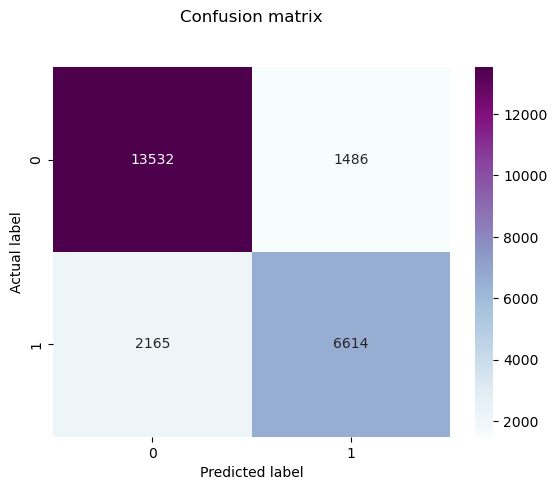

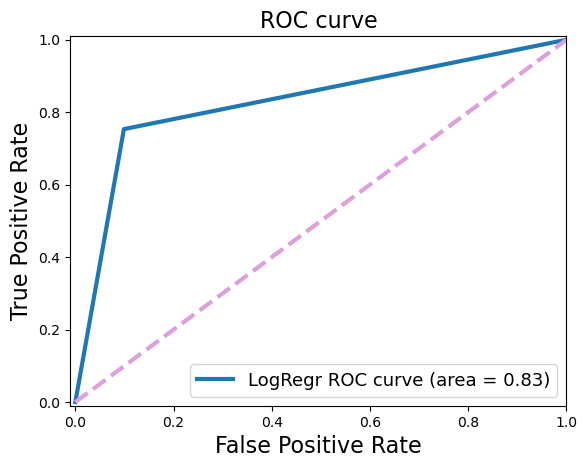

For k =  15
accuracy score for training =  0.8401130457365185
accuracy score for testing =  0.846745388074127
error rate in prediction =  0.15325461192587297
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.75      0.78      8779

    accuracy                           0.85     23797
   macro avg       0.84      0.83      0.83     23797
weighted avg       0.85      0.85      0.85     23797



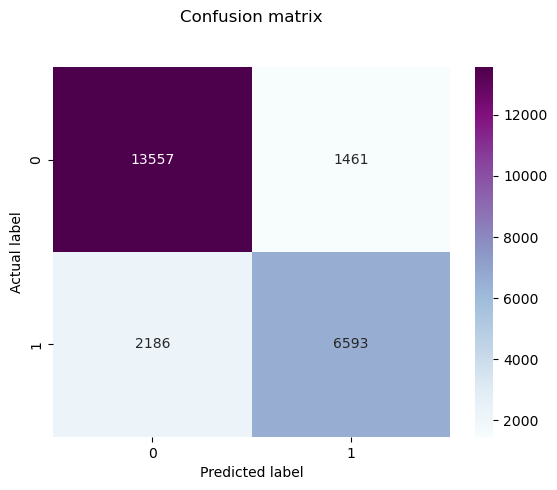

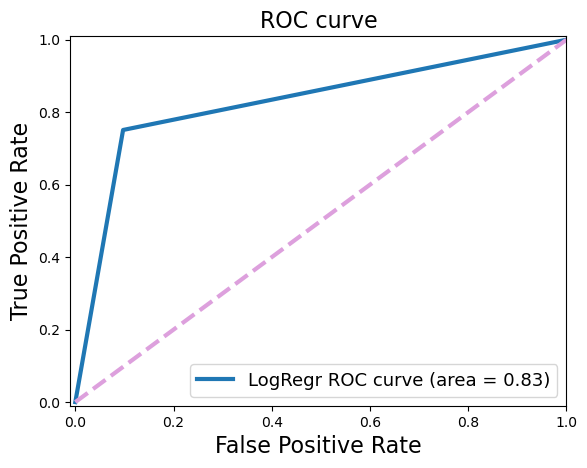

For k =  17
accuracy score for training =  0.8399239425175878
accuracy score for testing =  0.8449804597218137
error rate in prediction =  0.15501954027818632
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.75      0.78      8779

    accuracy                           0.84     23797
   macro avg       0.84      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



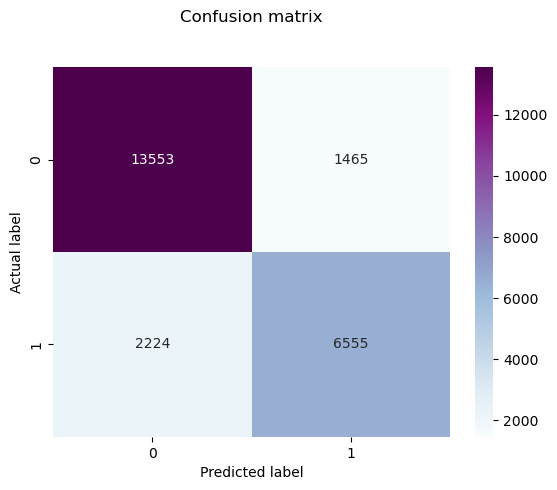

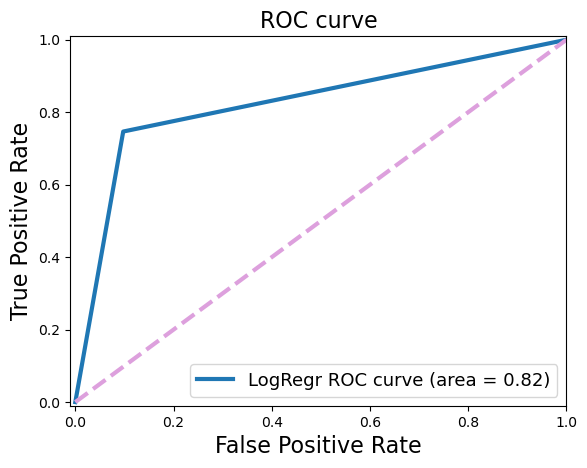

For k =  19
accuracy score for training =  0.8399029374255914
accuracy score for testing =  0.8454006807580787
error rate in prediction =  0.15459931924192127
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.75      0.78      8779

    accuracy                           0.85     23797
   macro avg       0.84      0.82      0.83     23797
weighted avg       0.84      0.85      0.84     23797



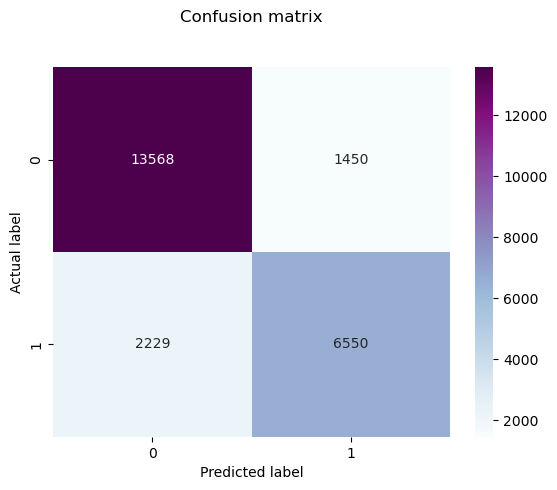

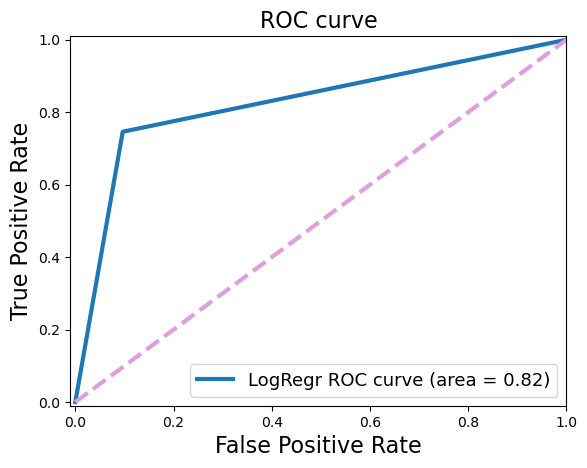

For k =  21
accuracy score for training =  0.8400920583032793
accuracy score for testing =  0.8434676639912594
error rate in prediction =  0.1565323360087406
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.74      0.78      8779

    accuracy                           0.84     23797
   macro avg       0.84      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



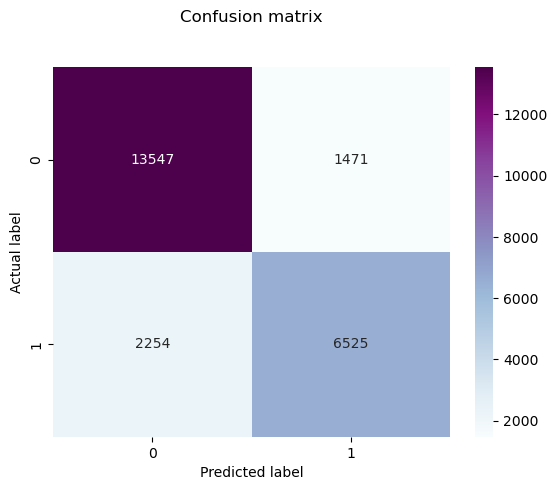

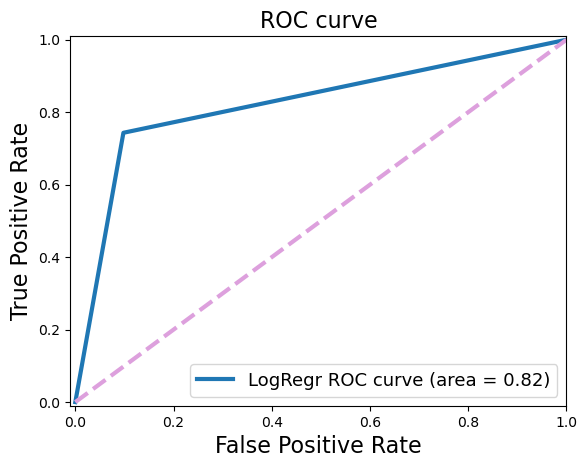

For k =  23
accuracy score for training =  0.8389889698048105
accuracy score for testing =  0.8435096860948859
error rate in prediction =  0.15649031390511414
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.74      0.78      8779

    accuracy                           0.84     23797
   macro avg       0.84      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



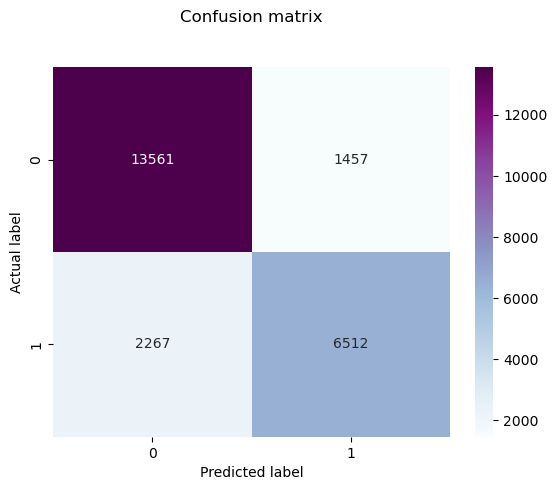

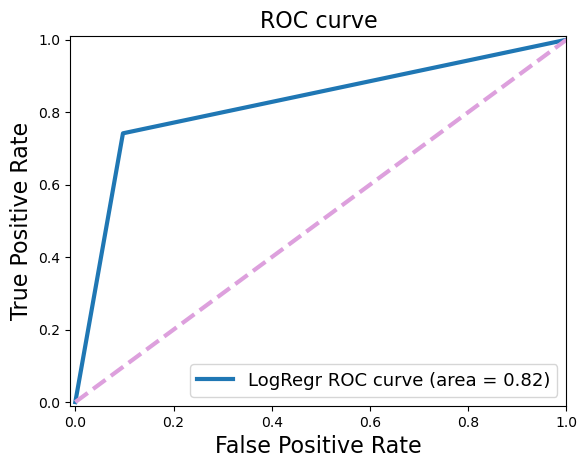

For k =  25
accuracy score for training =  0.8387998627230268
accuracy score for testing =  0.8422070008824641
error rate in prediction =  0.15779299911753586
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     15018
           1       0.82      0.74      0.78      8779

    accuracy                           0.84     23797
   macro avg       0.84      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



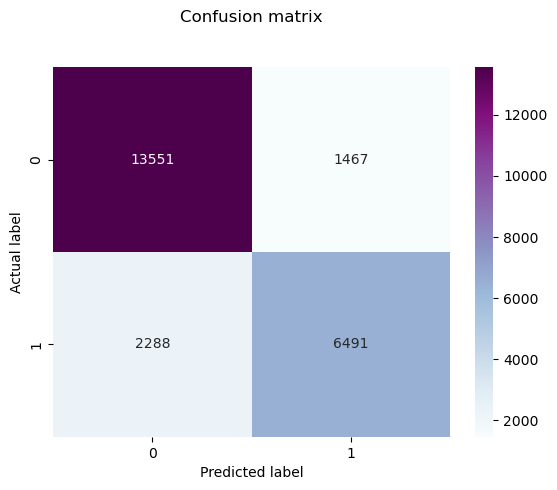

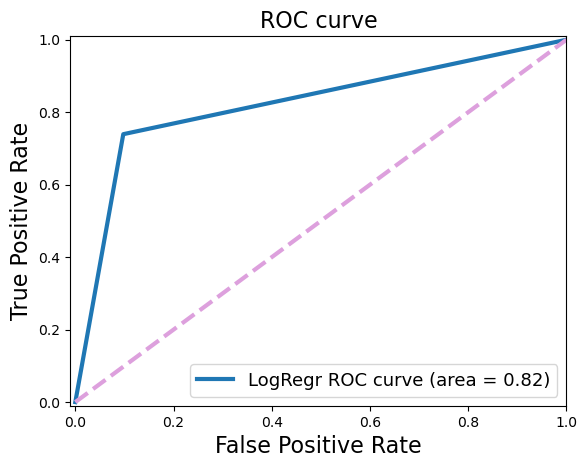

For k =  27
accuracy score for training =  0.8385687465609225
accuracy score for testing =  0.841702735638946
error rate in prediction =  0.15829726436105396
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15018
           1       0.82      0.74      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.84      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



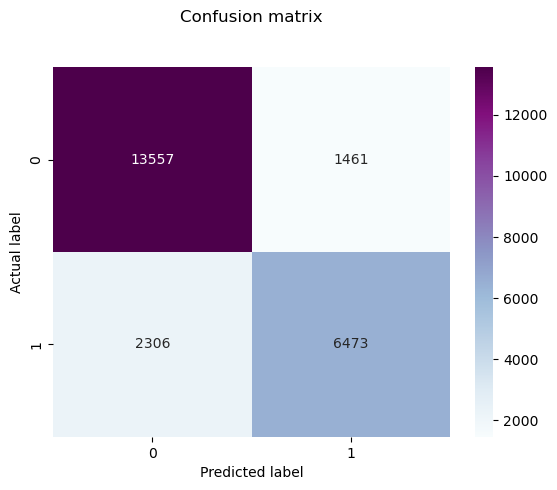

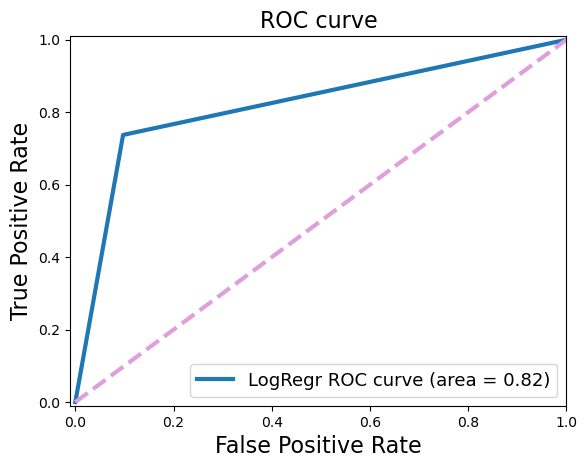

For k =  29
accuracy score for training =  0.8377913186601532
accuracy score for testing =  0.8409043156700424
error rate in prediction =  0.15909568432995758
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15018
           1       0.81      0.74      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



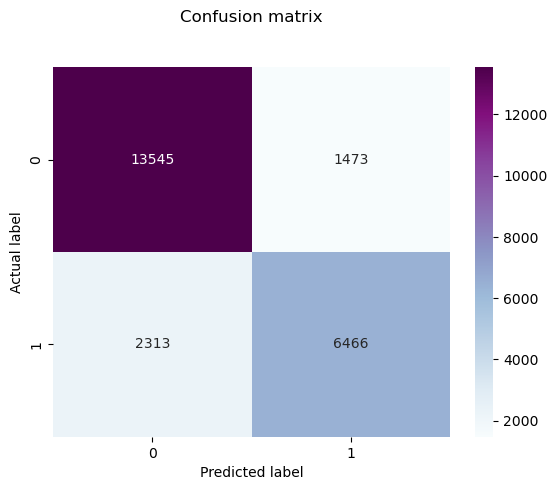

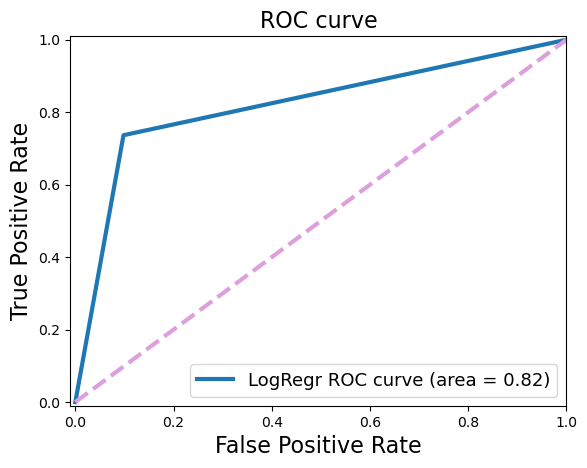

For k =  31
accuracy score for training =  0.8377702942538907
accuracy score for testing =  0.8404840946337774
error rate in prediction =  0.15951590536622262
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15018
           1       0.81      0.73      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.82     23797
weighted avg       0.84      0.84      0.84     23797



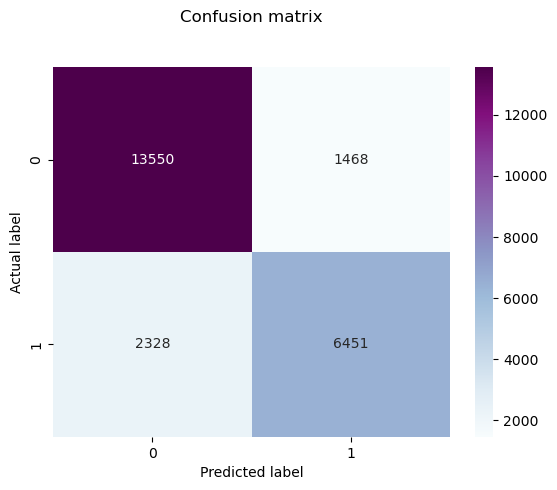

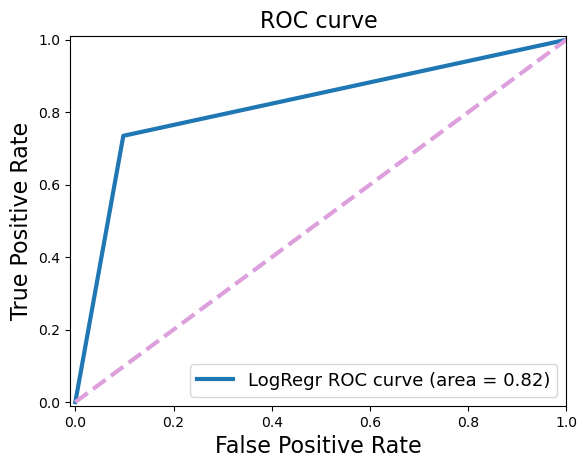

For k =  33
accuracy score for training =  0.8370769098982264
accuracy score for testing =  0.8394755641467412
error rate in prediction =  0.16052443585325882
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15018
           1       0.81      0.73      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.82     23797
weighted avg       0.84      0.84      0.84     23797



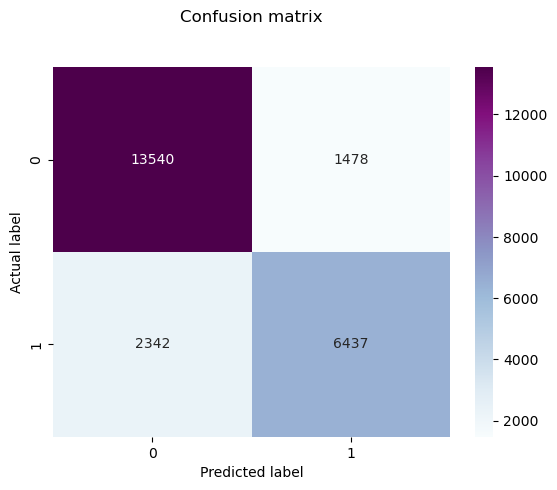

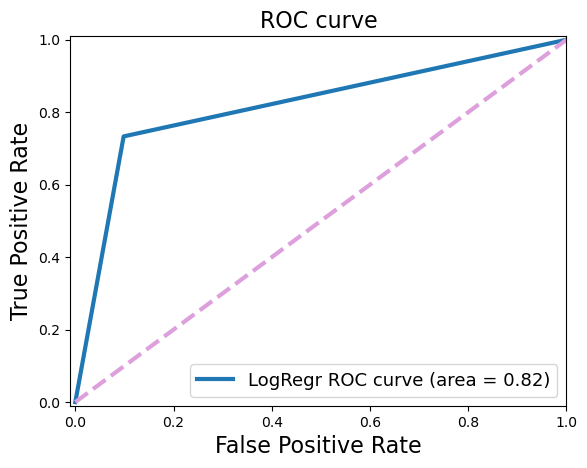

For k =  35
accuracy score for training =  0.8362259387910053
accuracy score for testing =  0.83888725469597
error rate in prediction =  0.16111274530402997
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15018
           1       0.81      0.73      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.82     23797
weighted avg       0.84      0.84      0.84     23797



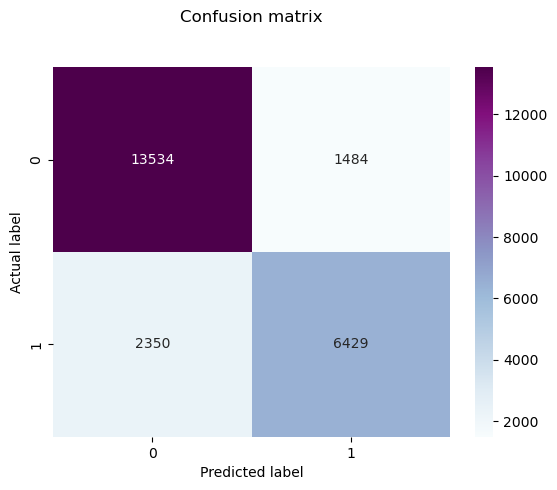

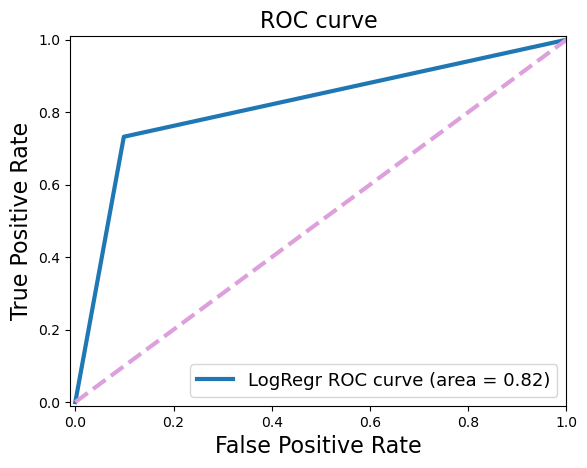

For k =  37
accuracy score for training =  0.8357006453884047
accuracy score for testing =  0.8383409673488255
error rate in prediction =  0.16165903265117454
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15018
           1       0.81      0.73      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.82     23797
weighted avg       0.84      0.84      0.84     23797



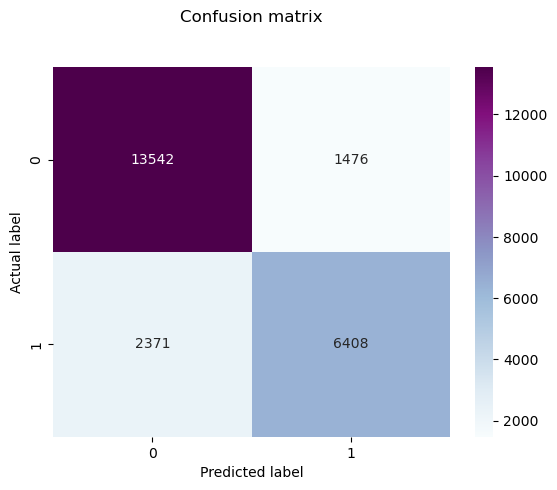

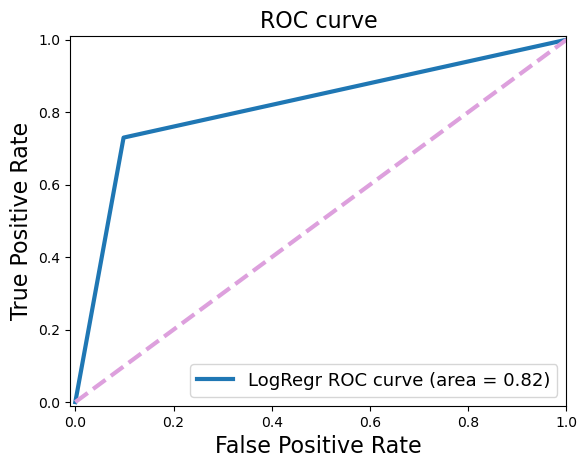

For k =  39
accuracy score for training =  0.835364465137786
accuracy score for testing =  0.8372483926545363
error rate in prediction =  0.16275160734546368
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15018
           1       0.81      0.73      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.84      0.84      0.84     23797



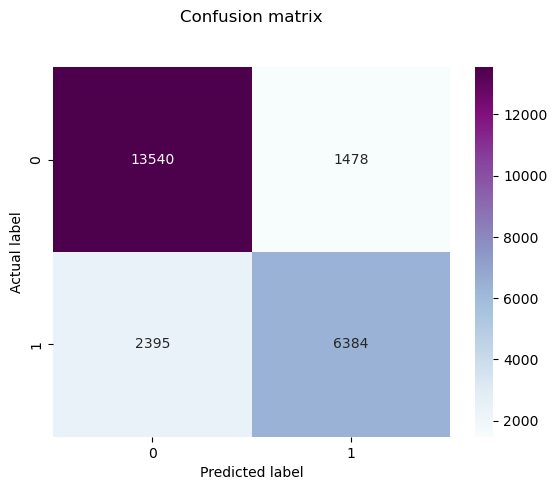

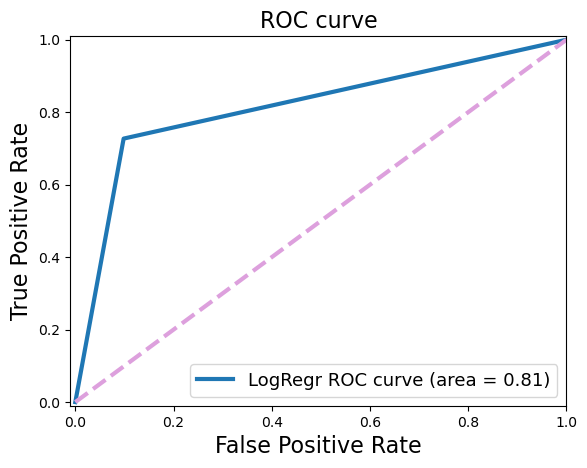

For k =  41
accuracy score for training =  0.8348707047576438
accuracy score for testing =  0.8372483926545363
error rate in prediction =  0.16275160734546368
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     15018
           1       0.81      0.72      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.84      0.84      0.84     23797



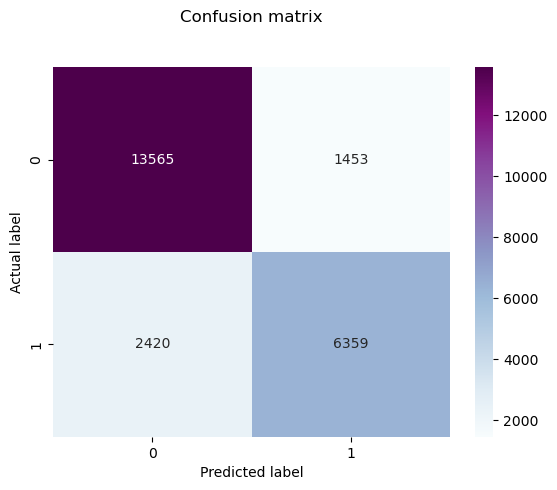

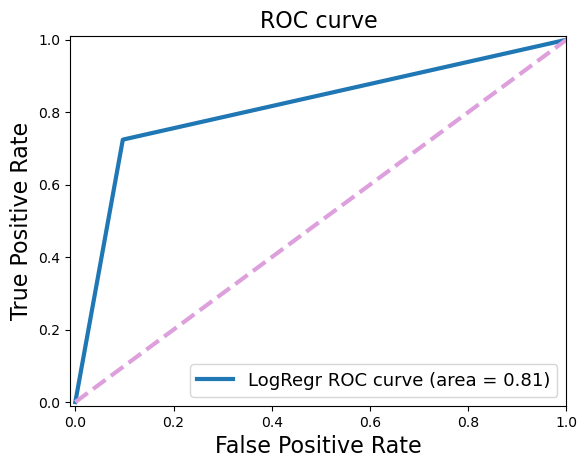

For k =  43
accuracy score for training =  0.8342403621661054
accuracy score for testing =  0.8361978400638735
error rate in prediction =  0.16380215993612646
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15018
           1       0.81      0.72      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.84      0.83     23797



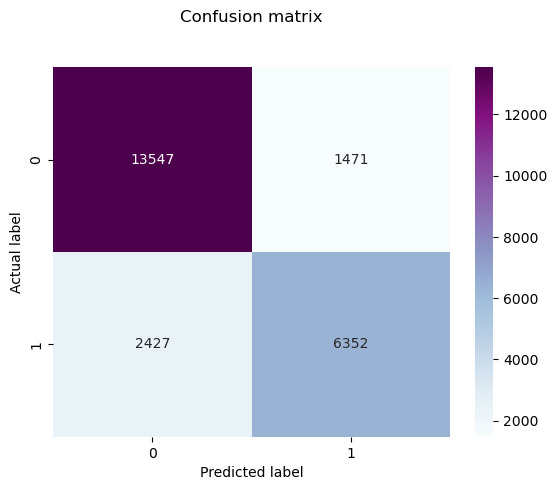

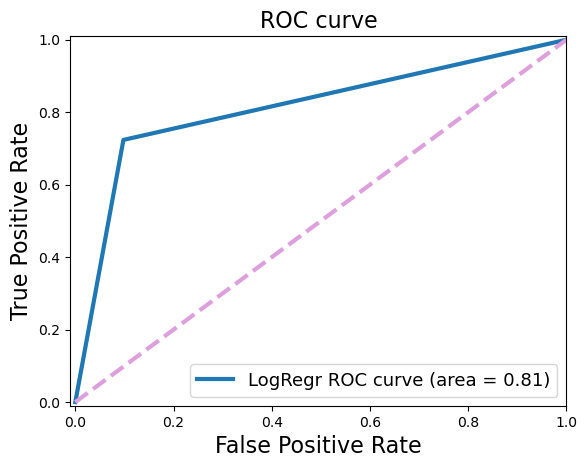

For k =  45
accuracy score for training =  0.8341458111084765
accuracy score for testing =  0.8367441274110182
error rate in prediction =  0.16325587258898178
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15018
           1       0.81      0.72      0.77      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.84      0.84      0.83     23797



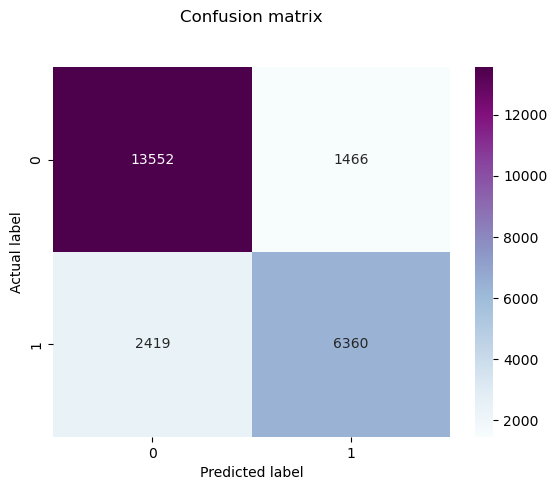

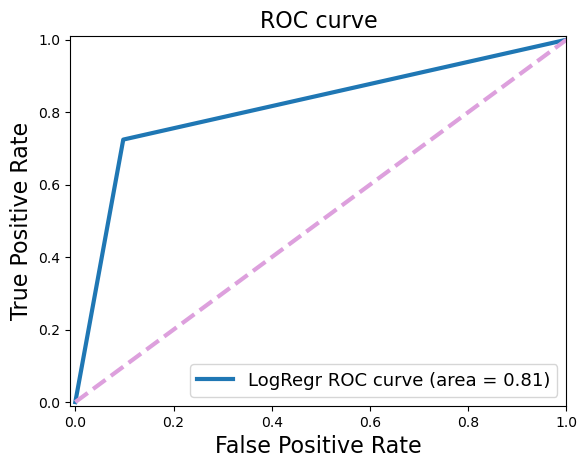

For k =  47
accuracy score for training =  0.8337466084079977
accuracy score for testing =  0.8355254864058494
error rate in prediction =  0.16447451359415055
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.84      0.83     23797



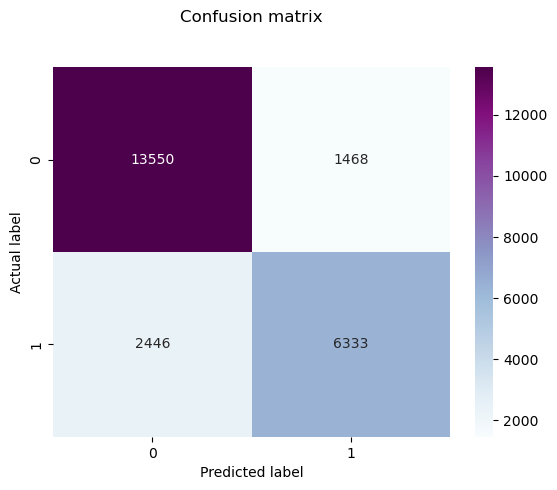

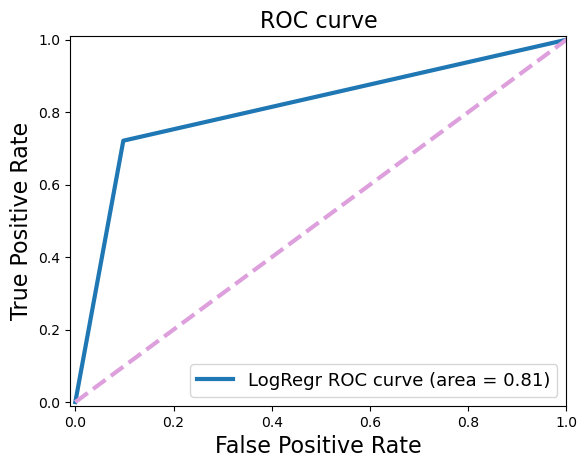

For k =  49
accuracy score for training =  0.8335995330318177
accuracy score for testing =  0.8355254864058494
error rate in prediction =  0.16447451359415055
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.84      0.83     23797



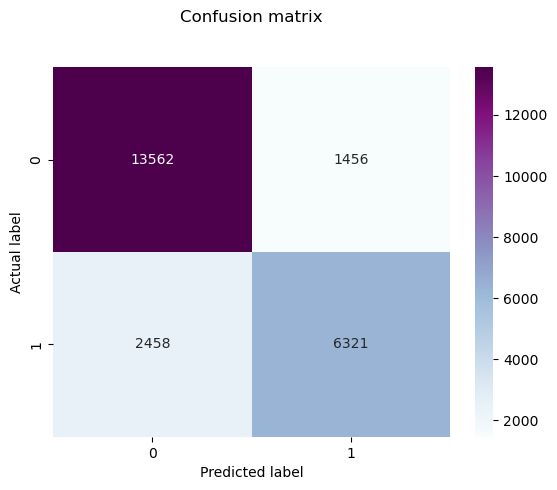

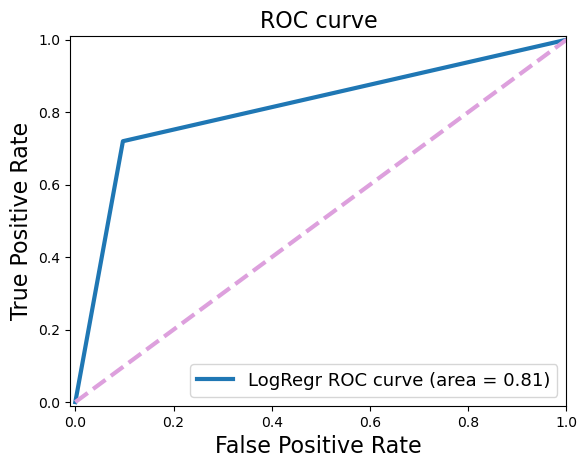

For k =  51
accuracy score for training =  0.8332843595287039
accuracy score for testing =  0.835315375887717
error rate in prediction =  0.16468462411228302
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.84      0.83     23797



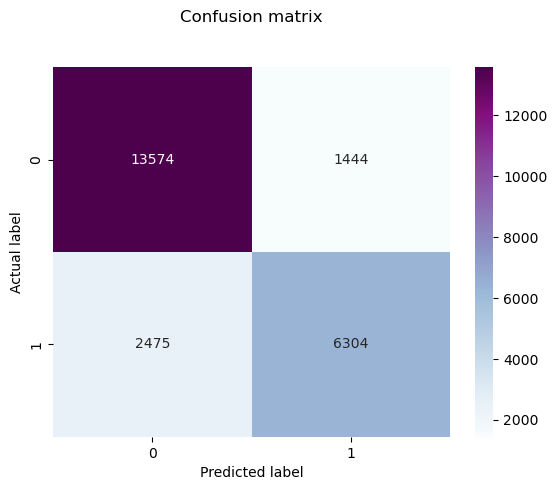

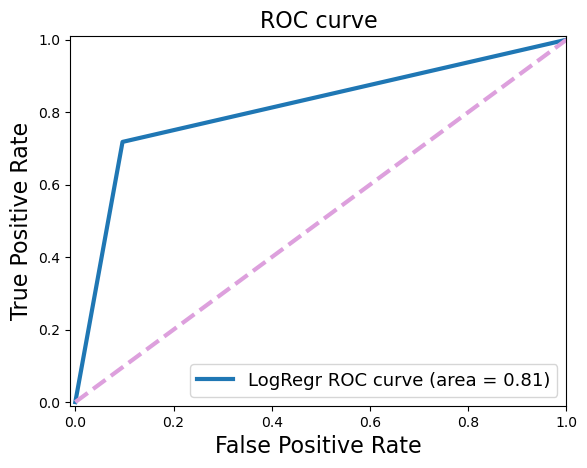

For k =  53
accuracy score for training =  0.8331057560965908
accuracy score for testing =  0.8356935748203556
error rate in prediction =  0.16430642517964444
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.84      0.83     23797



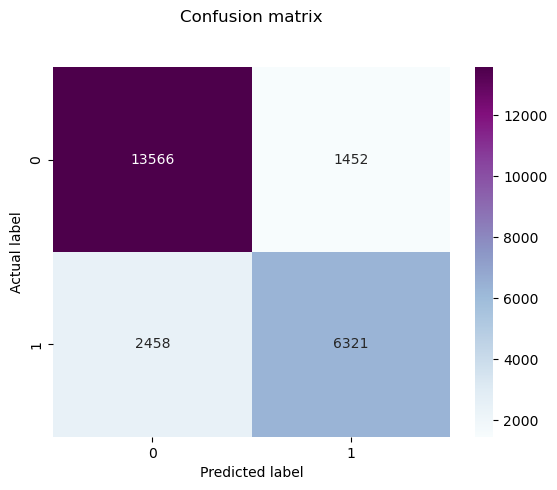

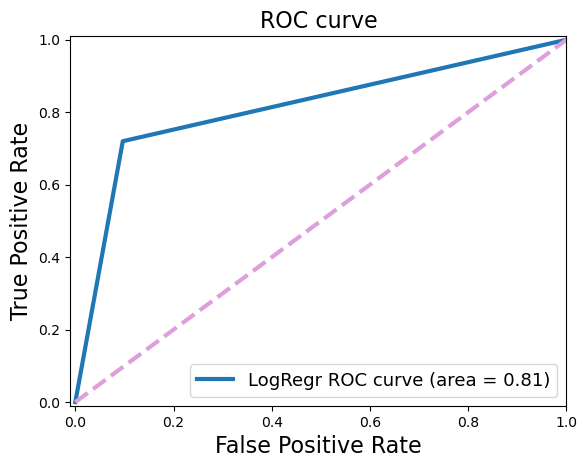

For k =  55
accuracy score for training =  0.8326960387097181
accuracy score for testing =  0.8351052653695844
error rate in prediction =  0.1648947346304156
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.84     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.84      0.83     23797



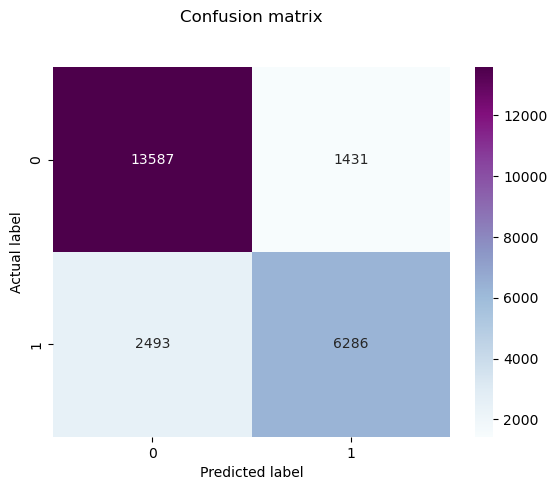

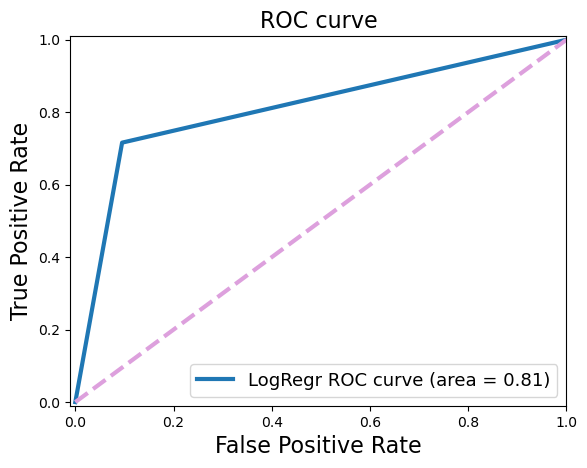

For k =  57
accuracy score for training =  0.8328956422673022
accuracy score for testing =  0.8339286464680422
error rate in prediction =  0.1660713535319578
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



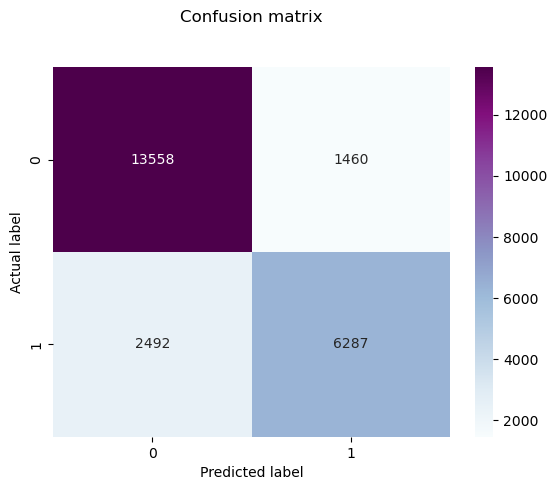

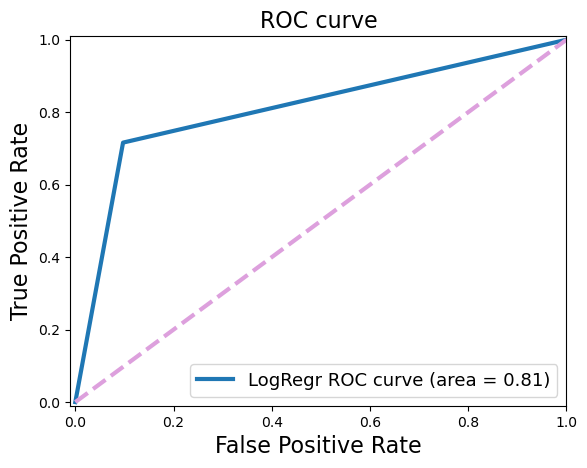

For k =  59
accuracy score for training =  0.8324859149473782
accuracy score for testing =  0.8340967348825482
error rate in prediction =  0.1659032651174518
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



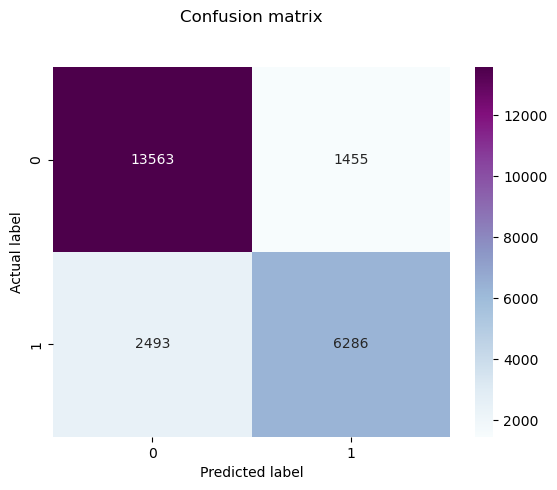

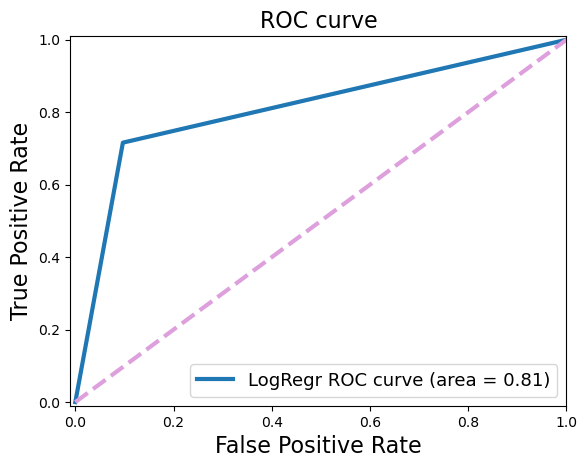

For k =  61
accuracy score for training =  0.8321602328280682
accuracy score for testing =  0.8332983149136446
error rate in prediction =  0.1667016850863554
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



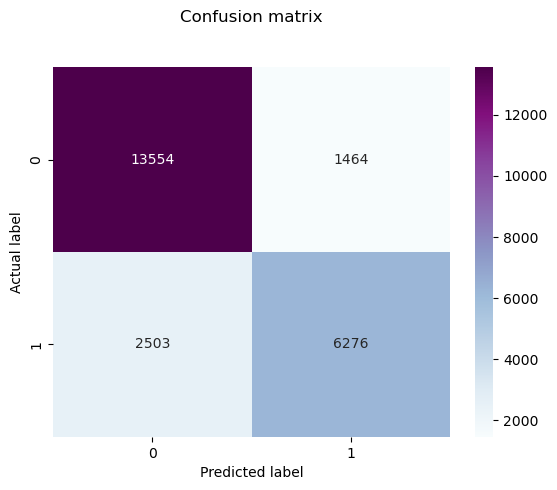

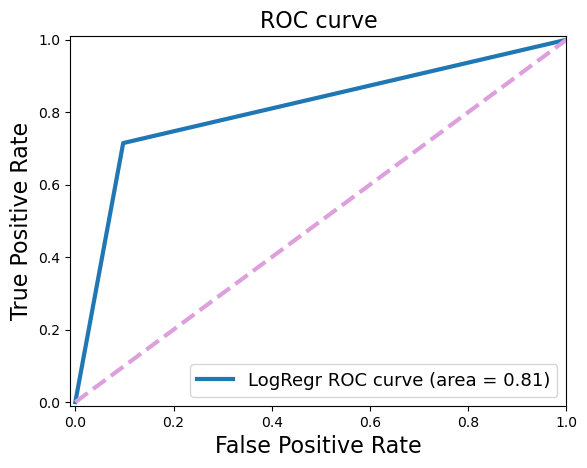

For k =  63
accuracy score for training =  0.8320341625438848
accuracy score for testing =  0.8333823591208976
error rate in prediction =  0.16661764087910236
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.72      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



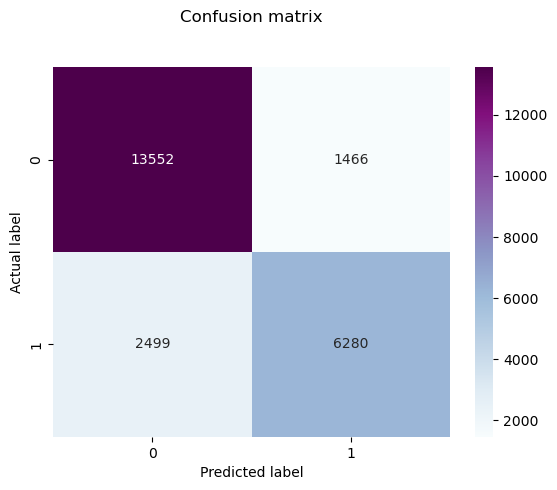

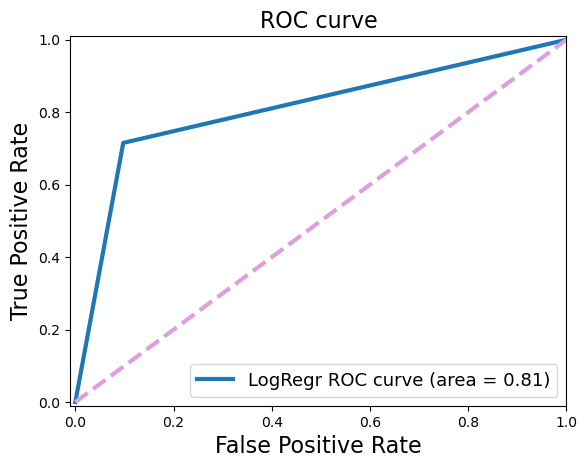

For k =  65
accuracy score for training =  0.8316664586520222
accuracy score for testing =  0.8332142707063915
error rate in prediction =  0.16678572929360846
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



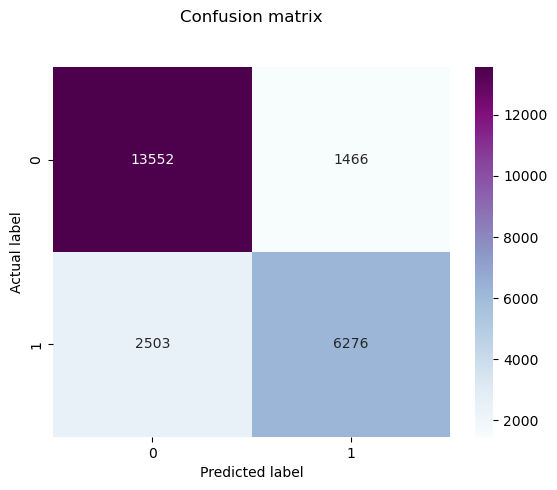

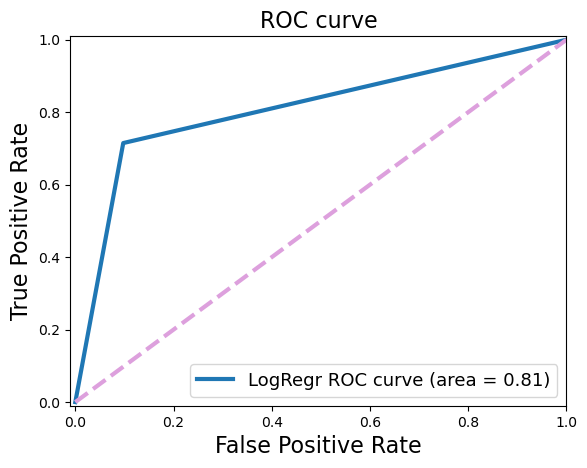

For k =  67
accuracy score for training =  0.831372300725792
accuracy score for testing =  0.8331722486027651
error rate in prediction =  0.16682775139723494
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



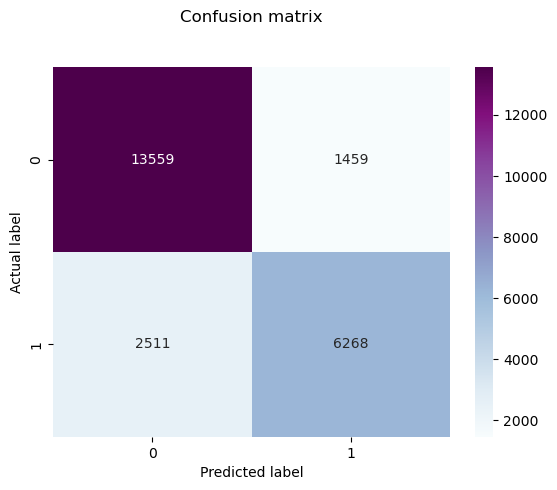

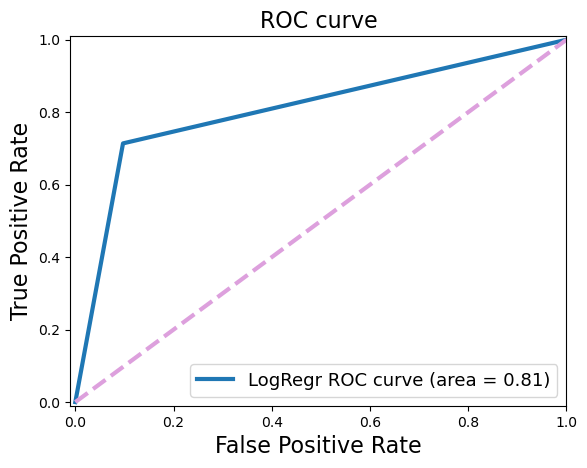

For k =  69
accuracy score for training =  0.8314878607382707
accuracy score for testing =  0.8330461822918855
error rate in prediction =  0.16695381770811446
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



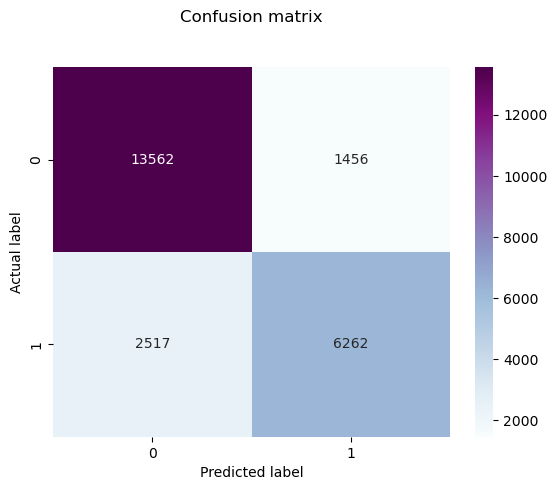

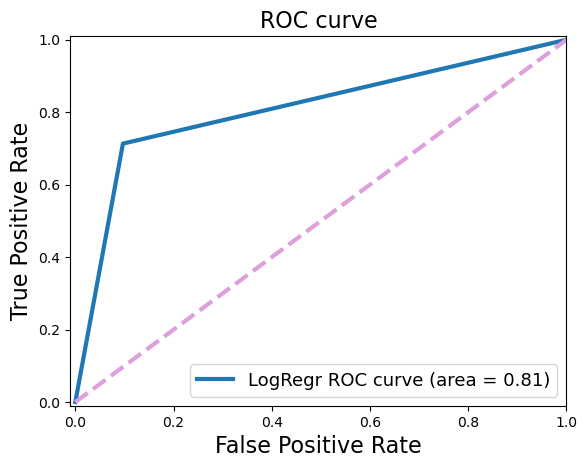

For k =  71
accuracy score for training =  0.83140381222664
accuracy score for testing =  0.8332562928100181
error rate in prediction =  0.16674370718998188
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



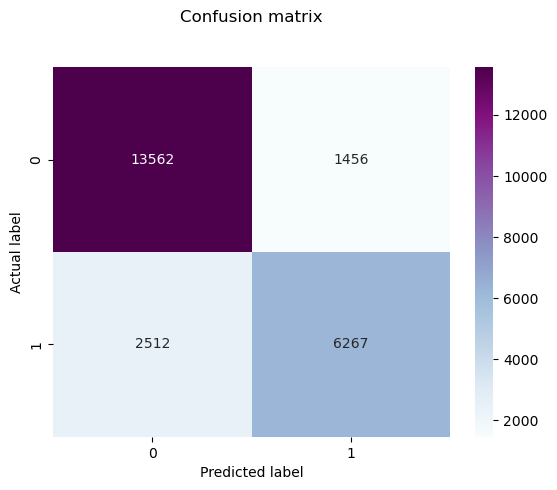

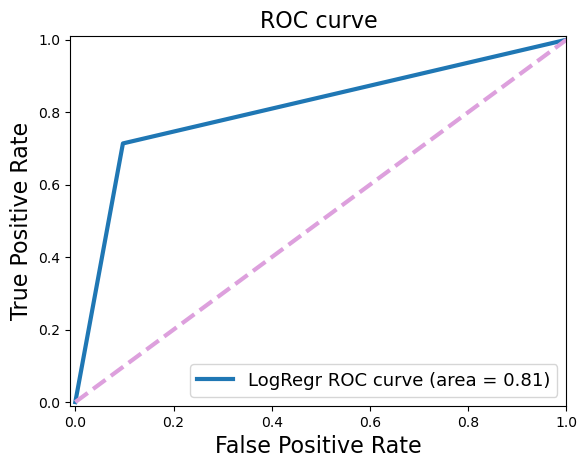

For k =  73
accuracy score for training =  0.8309730765037028
accuracy score for testing =  0.8332562928100181
error rate in prediction =  0.16674370718998188
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



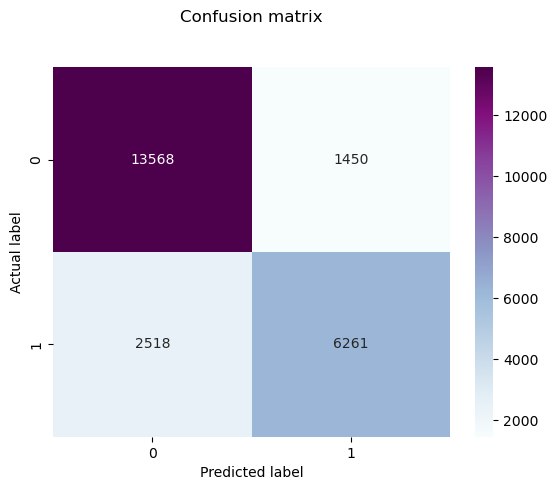

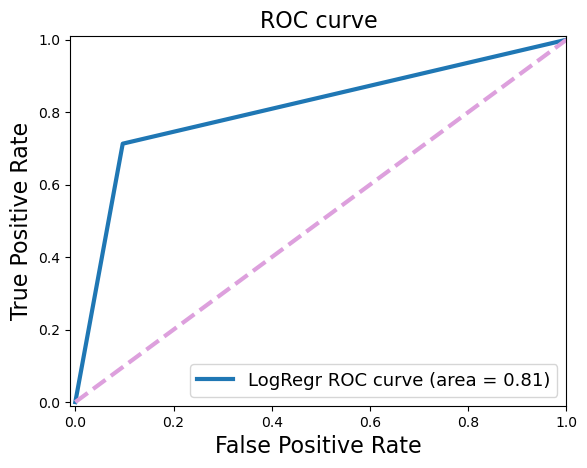

For k =  75
accuracy score for training =  0.8311621758597798
accuracy score for testing =  0.8332983149136446
error rate in prediction =  0.1667016850863554
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



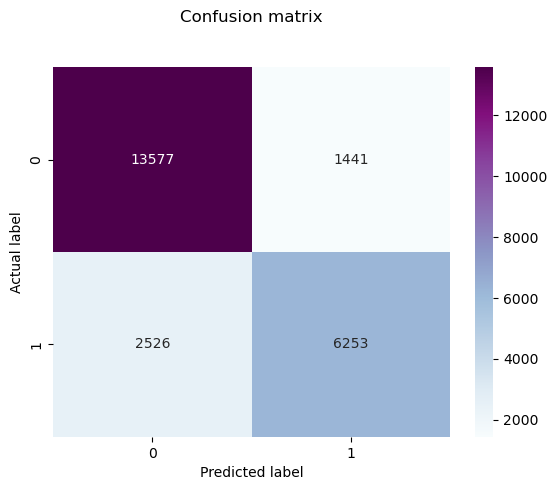

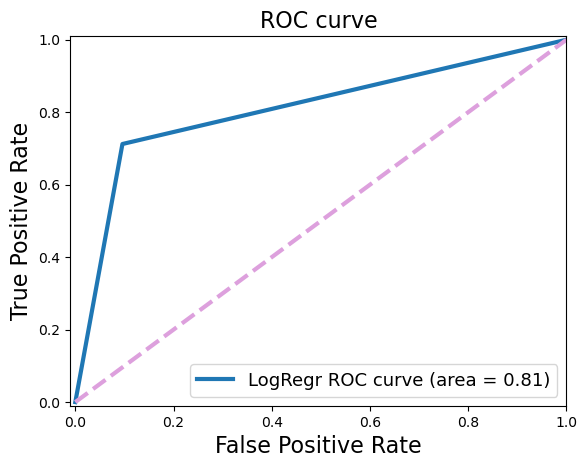

For k =  77
accuracy score for training =  0.8305318249906989
accuracy score for testing =  0.8326259612556205
error rate in prediction =  0.1673740387443795
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15018
           1       0.81      0.71      0.76      8779

    accuracy                           0.83     23797
   macro avg       0.83      0.81      0.82     23797
weighted avg       0.83      0.83      0.83     23797



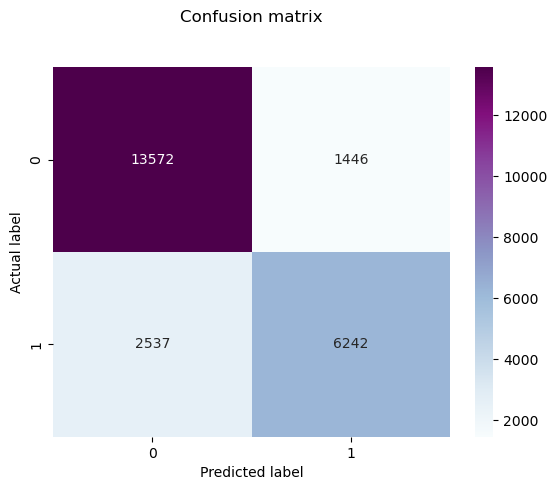

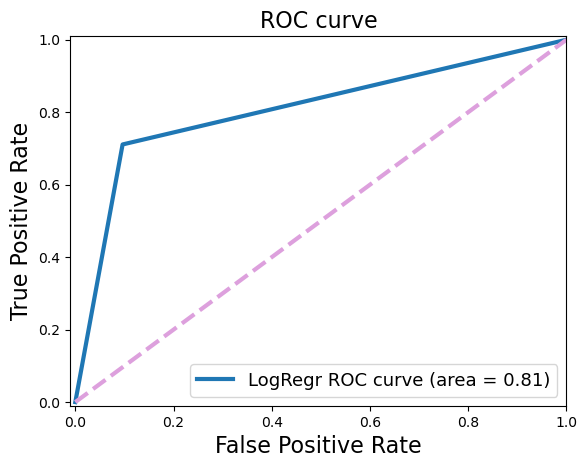

In [77]:
from sklearn.model_selection import cross_val_score
accuracy_score_train = []
accuracy_score_test = []
error_rate = []

k_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score=cross_val_score(knn, X_train ,y_train, cv=5)
    y_pred = knn.predict(X_test)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    accuracy_score_train.append(score.mean())
    score2=knn.score(X_test,y_test)
    accuracy_score_test.append(score2)
    error = 1-score2
    error_rate.append(error)
    confusion = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(confusion)
    print("For k = ", i)
    print("accuracy score for training = ", score.mean())
    print("accuracy score for testing = ", score2)
    print("error rate in prediction = ", error)
    print(classification_report(y_test,y_pred))
    sns.heatmap(cm, annot=True,fmt="g",cmap="BuPu")
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='plum', lw=3, linestyle='--')
    plt.show()

In [78]:
accuracy_score_test

[0.8377526578980544,
 0.8424591335042232,
 0.8443501281674161,
 0.8453586586544523,
 0.8461570786233559,
 0.8468714543850066,
 0.8465772996596209,
 0.846745388074127,
 0.8449804597218137,
 0.8454006807580787,
 0.8434676639912594,
 0.8435096860948859,
 0.8422070008824641,
 0.841702735638946,
 0.8409043156700424,
 0.8404840946337774,
 0.8394755641467412,
 0.83888725469597,
 0.8383409673488255,
 0.8372483926545363,
 0.8372483926545363,
 0.8361978400638735,
 0.8367441274110182,
 0.8355254864058494,
 0.8355254864058494,
 0.835315375887717,
 0.8356935748203556,
 0.8351052653695844,
 0.8339286464680422,
 0.8340967348825482,
 0.8332983149136446,
 0.8333823591208976,
 0.8332142707063915,
 0.8331722486027651,
 0.8330461822918855,
 0.8332562928100181,
 0.8332562928100181,
 0.8332983149136446,
 0.8326259612556205]

In [79]:
k_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77]

[Text(0.5, 0, 'k'),
 Text(0, 0.5, 'cv accuracy'),
 Text(0.5, 1.0, 'CV Accuracy based on the Value of k')]

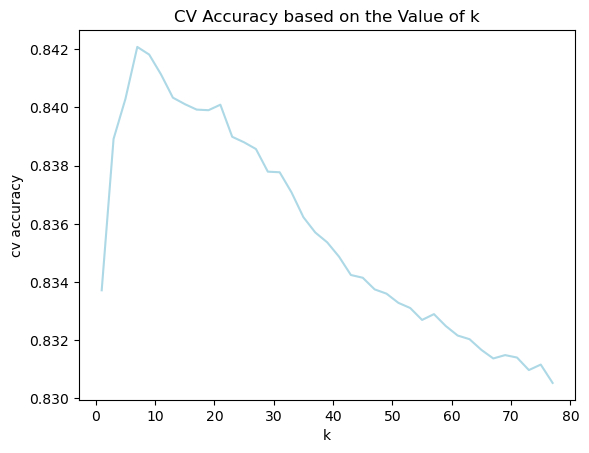

In [80]:
fig, ax = plt.subplots()
ax.plot(k_range,accuracy_score_train, color='lightblue')
ax.set(xlabel='k', ylabel='cv accuracy',
       title='CV Accuracy based on the Value of k')

In [82]:
np.argmax(accuracy_score_test)

5

In [83]:
k_range[5]

11